<a href="https://colab.research.google.com/github/nnanna217/msc-image-search/blob/main/Instance_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pixellib


In [ ]:
!wget "https://miro.medium.com/v2/resize:fit:1400/format:webp/1*xgJMGBk8Zu5cDwkwIkxf-A.jpeg"

In [ ]:
!pip3 install pixellib --upgrade

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
test_image1 = "/gdrive/MyDrive/Colab Notebooks/test-images/images2.jpeg"
test_image2 = "/gdrive/MyDrive/Colab Notebooks/test-images/image-4.jpeg"
test_image3 = "/gdrive/MyDrive/Colab Notebooks/test-images/image3.jpg"
test_image4 = "/gdrive/MyDrive/Colab Notebooks/test-images/image-3.jpeg"
test_image5 = "/gdrive/MyDrive/Colab Notebooks/test-images/img-1.jpeg"
test_image6 = "/gdrive/MyDrive/Colab Notebooks/test-images/img-2.jpeg"
test_image7 = "/gdrive/MyDrive/Colab Notebooks/test-images/img-3.jpeg"

model = "/gdrive/MyDrive/Colab Notebooks/pointrend_resnet50.pkl"

In [ ]:
import pixellib
from pixellib.instance import instance_segmentation

segment_image=instance_segmentation()
segment_image.load_model("segmentation/mask_rcnn_coco.h5")
# target_classes = segment_image.select_target_classes(person=True)
segment_image.segmentImage("segmentation/input/images2.jpeg", extract_segmented_objects=False, save_extracted_objects=False, show_bboxes=True,  output_image_name="output.jpg")

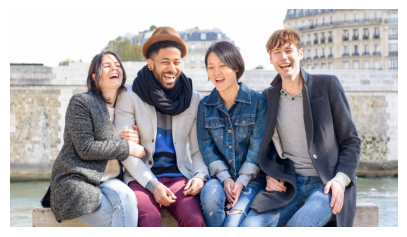

In [ ]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread(test_image1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show()

#### Helper fn to delete unwanted images

In [ ]:
import glob
import os

def delete_files_with_extension(directory, extension, exclude_files):
    file_pattern = os.path.join(directory, f"*.{extension}")
    files = glob.glob(file_pattern)

    for file in files:
        if file not in exclude_files:
            os.remove(file)
            print(f"Deleted file: {file}")

# Usage example
directory_to_search = "segmentation/"
extension_to_delete = "jpg"
files_to_exclude = ["images3.jpg", "sample2.jpg", "images_new.jpg", "output.jpg"]

delete_files_with_extension(directory_to_search, extension_to_delete, files_to_exclude)


In [ ]:
# import pixellib
# from pixellib.instance import instance_segmentation

# segment_image = instance_segmentation()
# segment_image.load_model("segmentation/mask_rcnn_coco.h5")
# segment_image.segmentImage("segmentation/input/sample2.jpg", output_image_name = "segmentation/output/image_new.jpg", show_bboxes = True)

In [ ]:
# seg = instance_segmentation()
# seg.load_model("mask_rcnn_coco.h5")
# seg.segmentImage("image3.jpg", show_bboxes=True, output_image_name="detections/output.jpg",
# extract_segmented_objects= True, save_extracted_objects=True)

#### Using Pixellib

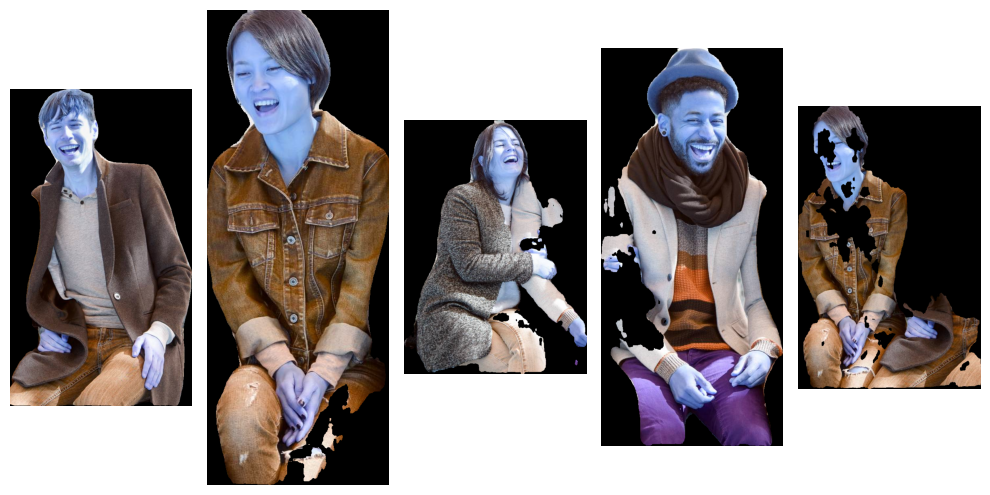

In [ ]:
import matplotlib.pyplot as plt

def display_extracted_objects(extracted_objects):
    num_objects = len(extracted_objects)

    fig, axs = plt.subplots(1, num_objects, figsize=(10, 10))

    for i in range(num_objects):
        axs[i].imshow(extracted_objects[i])
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
import pixellib
from pixellib.torchbackend.instance import instanceSegmentation
import cv2

instance_seg = instanceSegmentation()
instance_seg.load_model(model)
target_classes = instance_seg.select_target_classes(person = True)
segmask, output = instance_seg.segmentImage(test_image1,
                                            show_bboxes= True,
                                            extract_segmented_objects= True,
                                            segment_target_classes= target_classes)
cv2.imwrite("img.jpg", output)
print(output.shape)

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


(1080, 1920, 3)


In [ ]:
len(segmask['extracted_objects'])

5

In [ ]:
display_extracted_objects(segmask['extracted_objects'])

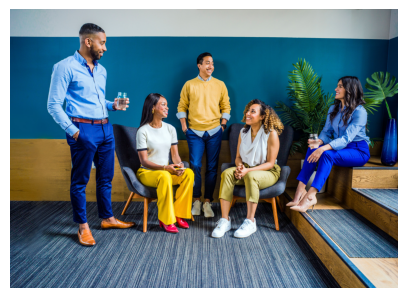

In [ ]:
image = cv2.imread(test_image5)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
segmask, output = instance_seg.segmentImage(test_image5,
                                            show_bboxes= True,
                                            extract_segmented_objects= True,
                                            segment_target_classes= target_classes)
cv2.imwrite("img2.jpg", output)
print(output.shape)

(2591, 3600, 3)


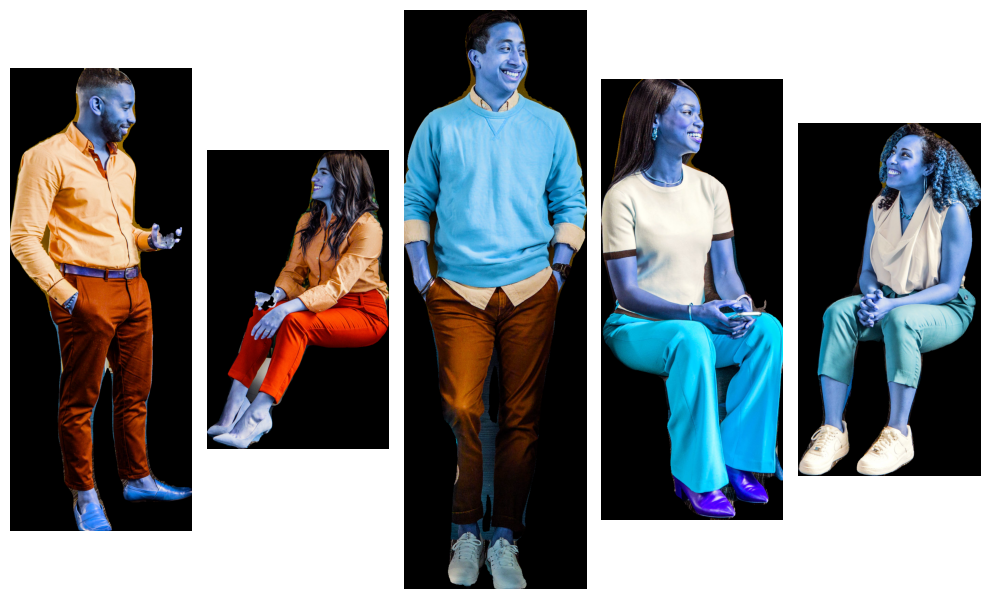

In [ ]:
display_extracted_objects(segmask['extracted_objects'])

In [ ]:
from google.colab import drive
import shutil
import zipfile
import os

def zip_directory(directory_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(directory_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, directory_path))

# Mount Google Drive
drive.mount('/content/drive')

# Directory to zip
directory_to_zip = 'segmentation'

# Output zip file path
output_zip_path = 'segmentation/archive.zip'

# Zip the directory
zip_directory(directory_to_zip, output_zip_path)

# Destination folder in Google Drive
drive_folder = '/content/drive/MyDrive/Colab Notebooks/Project/'

# Move the zip file to Google Drive
shutil.move(output_zip_path, os.path.join(drive_folder, os.path.basename(output_zip_path)))
